In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [2]:
audio_files = glob('../input/ravdess-emotional-speech-audio/*/*.wav')

In [3]:
# Play audio file.
ipd.Audio(audio_files[0])

In [4]:
y, sr = librosa.load(audio_files[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [-5.2092709e-14 -1.3858506e-12  1.3396042e-12  5.1150117e-12
  5.2895031e-13  4.1118975e-13  1.5539963e-12  6.2721109e-14
 -1.4052716e-12 -1.9114567e-12]
shape y: (82403,)
sr: 22050


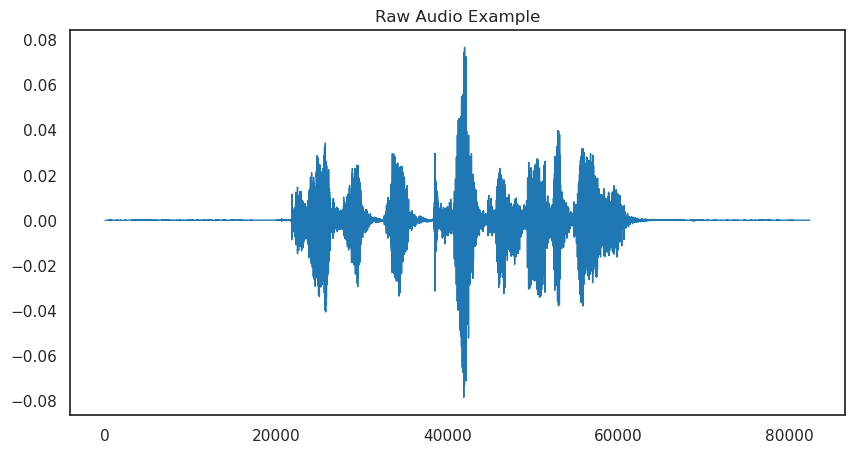

In [5]:
pd.Series(y).plot(figsize=(10, 5), lw=1, title='Raw Audio Example', color=color_pal[0])
plt.show()

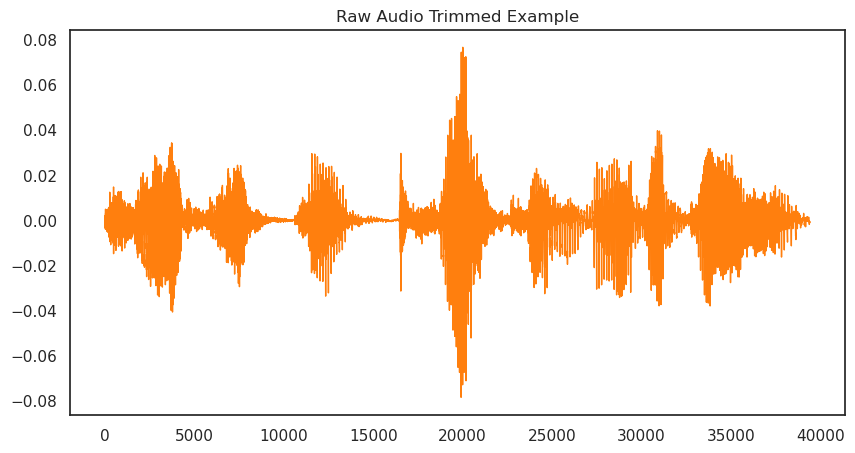

In [6]:
y_trimmed, _ = librosa.effects.trim(y, top_db=20)

pd.Series(y_trimmed).plot(figsize=(10, 5), lw=1, title='Raw Audio Trimmed Example', color=color_pal[1])
plt.show() 

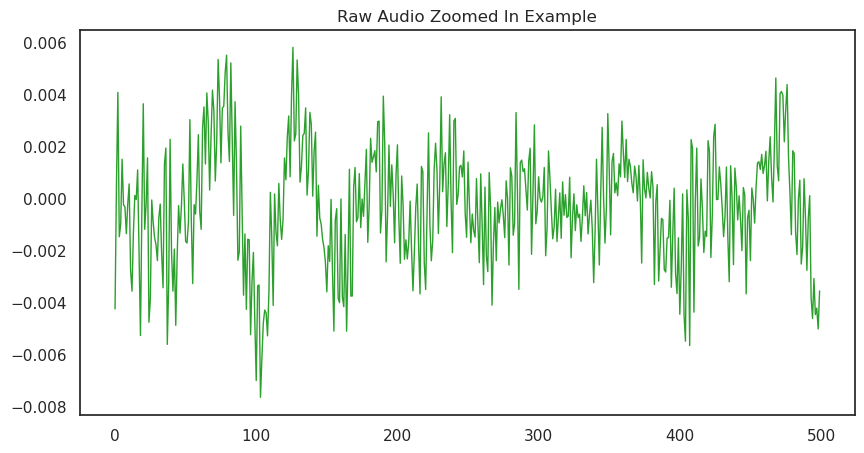

In [7]:
pd.Series(y[30000:30500]).plot(figsize=(10, 5), lw=1, title='Raw Audio Zoomed In Example', color=color_pal[2])
plt.show()

In [8]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 161)

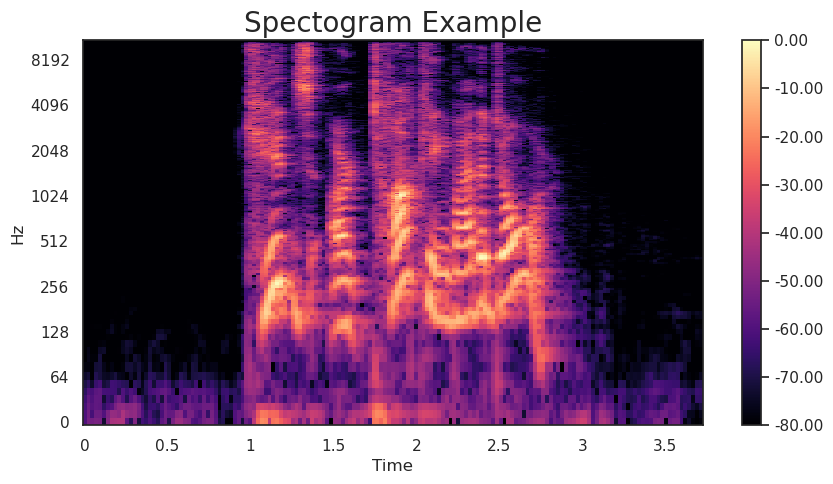

In [9]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db, 
                              x_axis = 'time',
                              y_axis = 'log',
                              ax = ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

# Mel Spectogram

In [15]:
S = librosa.feature.melspectrogram(y=y,
                               sr=sr, 
                               n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

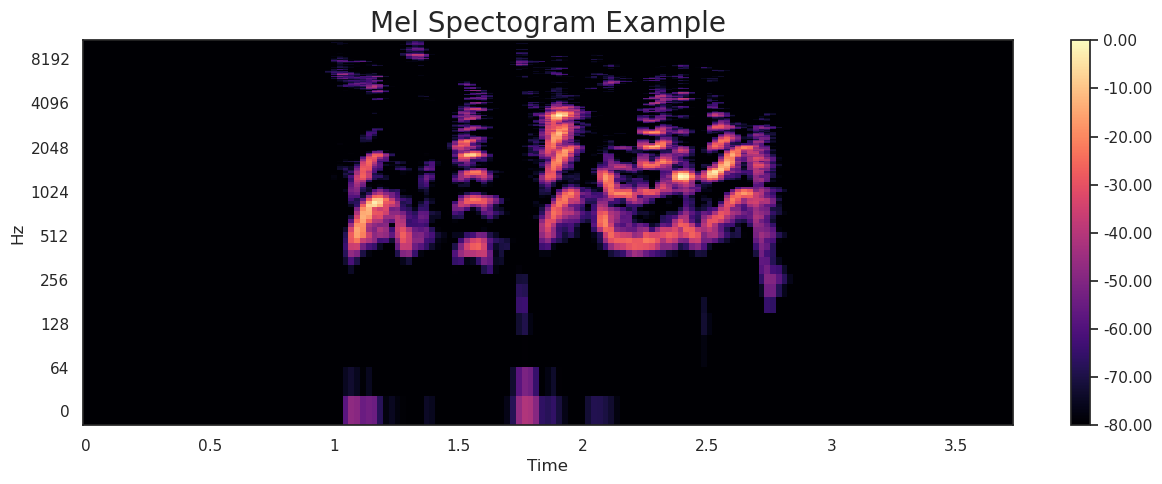

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))
img = librosa.display.specshow(S_db_mel, 
                              x_axis = 'time',
                              y_axis = 'log',
                              ax = ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [17]:
S_db_mel

array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ...,
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]], dtype=float32)